# 📦 Importing Libraries
Importing necessary libraries for data manipulation and visualization.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries has been imported')

Libraries has been imported


## 📂 Loading the Dataset
Reading the dataset into a pandas DataFrame.

In [2]:
#importing the csv file
df = pd.read_csv('D:/Users/user/Desktop/Building Portfolio/blinkit_data.csv')

## 🔍 Initial Data Exploration
Quick look at the structure and summary of the dataset.

In [3]:
#Examining the first 5 records
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
#How many fileds and records does this dataset have
df.shape

(8523, 12)

In [5]:
#Data cleaning
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                        'low fat':'Low Fat',
                                                        'reg':'Regular'})

In [7]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [8]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#Number of Items Sold
items_sold = df['Sales'].count()

#Average Rating
avg_rating = df['Rating'].mean()

print(f"Total Sales {total_sales:,.0f}\nAverage Sales {avg_sales:,.0f}\nNumber of items sold {items_sold:,.0f} \nAverage Rating {avg_rating:,.0f}")

Total Sales 1,201,681
Average Sales 141
Number of items sold 8,523 
Average Rating 4


## 📊 Aggregated Analysis
Analyzing data using groupings to find trends and summaries.

In [9]:
#Total Sales by Fat Content
sales_by_fat = df['Sales'].groupby(df['Item Fat Content']).sum()
print(sales_by_fat)

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64


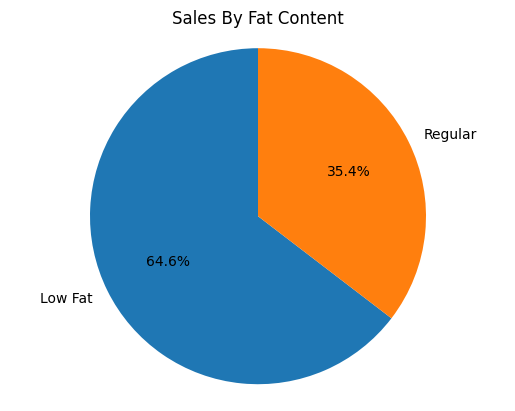

In [10]:
#Plotting a Pie-Chart
plt.pie(sales_by_fat,labels = sales_by_fat.index,autopct = '%.1f%%',startangle = 90)
plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show()

## 📊 Aggregated Analysis
Analyzing data using groupings to find trends and summaries.

In [11]:
#Total Sales by item type
sales_by_item = df['Sales'].groupby(df['Item Type']).sum().sort_values(ascending = False)
print(sales_by_item)

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64


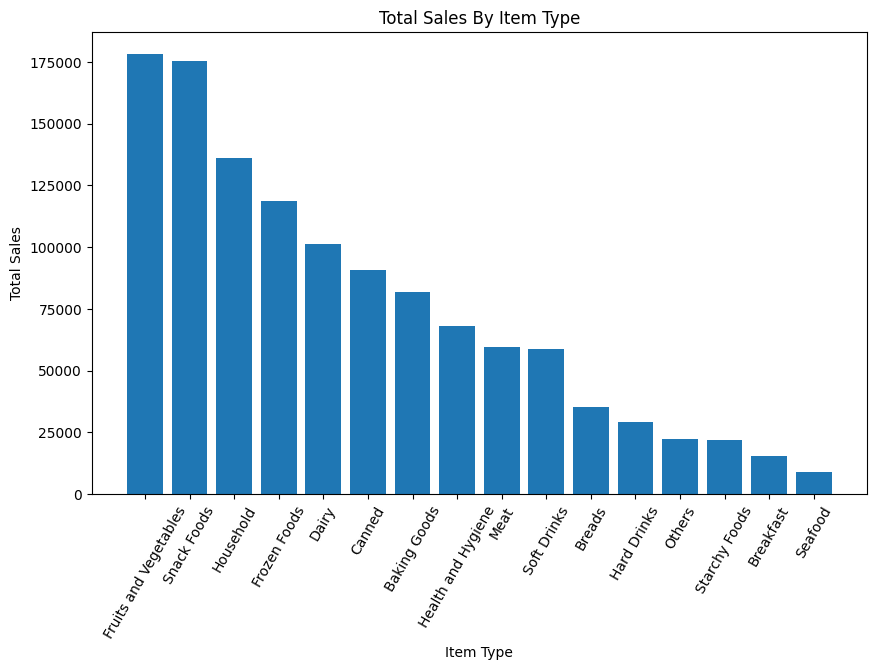

In [12]:
#Visualising it
plt.figure(figsize=(10,6))
plt.bar(sales_by_item.index,sales_by_item.values)

plt.xticks(rotation = 60)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales By Item Type')

plt.show()


## 📊 Aggregated Analysis
Analyzing data using groupings to find trends and summaries.

In [13]:
#Fat Content by Outlet for Total Sales
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
print(grouped)


Item Fat Content          Regular      Low Fat
Outlet Location Type                          
Tier 1                121349.8994  215047.9126
Tier 2                138685.8682  254464.7734
Tier 3                165326.0348  306806.9924


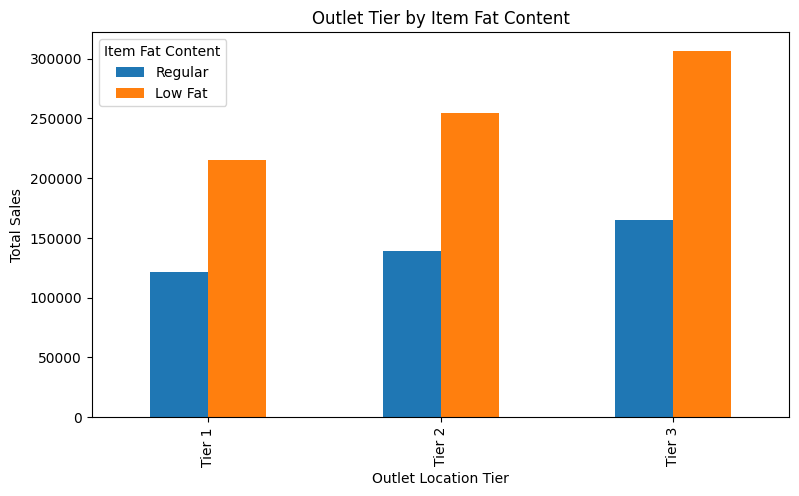

In [14]:
#Visualising it
ax = grouped.plot(kind = 'bar',figsize = (9,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')

plt.show()

## 📊 Aggregated Analysis
Analyzing data using groupings to find trends and summaries.

In [15]:
#Total Sales by Outlet Establishment Year
sales_by_outlet_year = df['Sales'].groupby(df['Outlet Establishment Year']).sum()
print(sales_by_outlet_year)


Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64


## 📈 Visualization
Visualizing insights with charts and graphs.

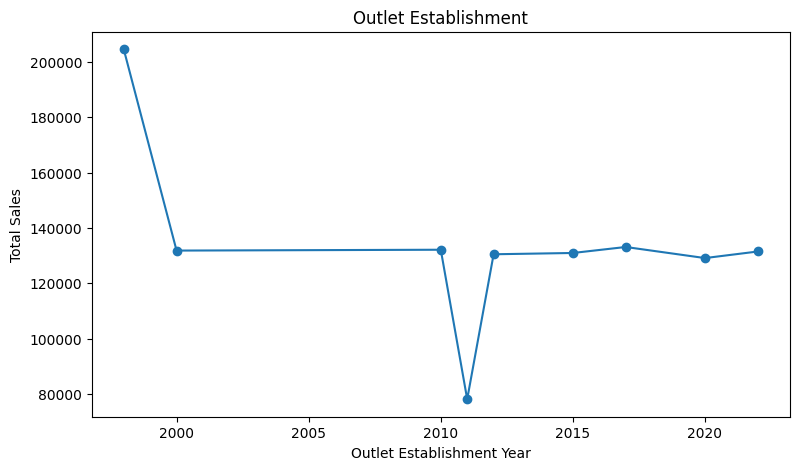

In [16]:
#Visulising it
plt.figure(figsize = (9,5))
plt.plot(sales_by_outlet_year.index,sales_by_outlet_year.values,marker='o',linestyle = '-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

plt.show()

## 📊 Aggregated Analysis
Analyzing data using groupings to find trends and summaries.

In [17]:
#Total Sales By Outlet Size
sales_by_size = df['Sales'].groupby(df['Outlet Size']).sum()
print(sales_by_size)

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64


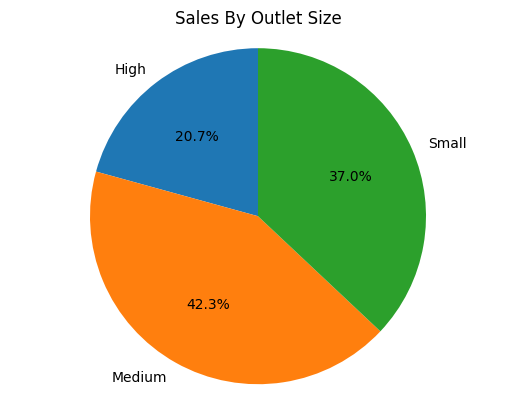

In [18]:
#Visulising it
plt.pie(sales_by_size,labels = sales_by_size.index,autopct = '%.1f%%',startangle = 90)
plt.title('Sales By Outlet Size')
plt.axis('equal')
plt.show()

## 📊 Aggregated Analysis
Analyzing data using groupings to find trends and summaries.

In [19]:
#Total Sales By Outlet Location
sales_by_location = df['Sales'].groupby(df['Outlet Location Type']).sum().sort_values(ascending = True)
print(sales_by_location)

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6416
Tier 3    472133.0272
Name: Sales, dtype: float64


## 📈 Visualization
Visualizing insights with charts and graphs.

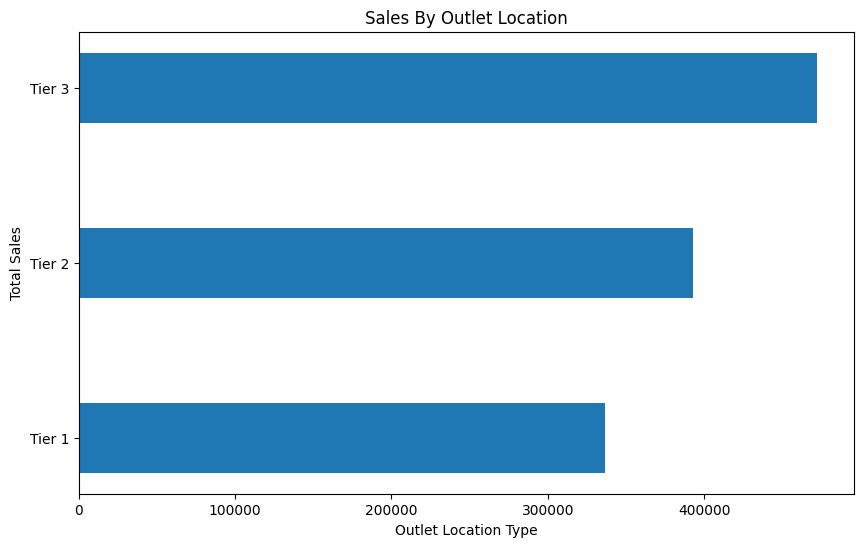

In [20]:
plt.figure(figsize=(10,6))
plt.barh(sales_by_location.index,sales_by_location.values,height =0.4)

plt.yticks(rotation = 0)
plt.ylabel('Total Sales')
plt.xlabel('Outlet Location Type')
plt.title('Sales By Outlet Location')

plt.show()
